<a href="https://colab.research.google.com/github/Sloppy1999/Predicted-Attrition-for-Employees/blob/main/Predicted_Attrition_for_Employees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocessing and model training complete.


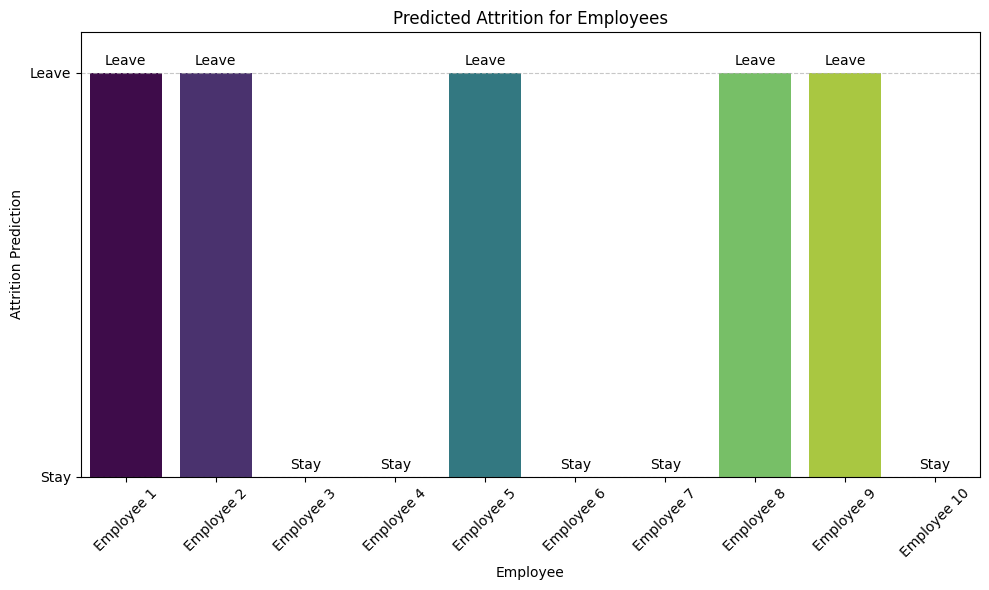

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import joblib

# Load dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Drop unnecessary columns
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

# Convert 'Attrition' to binary (Yes = 1, No = 0)
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encode categorical variables using OneHotEncoder or LabelEncoder
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Normalize numerical features
numerical_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'YearsAtCompany']
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Save the scaler and column names
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns, 'column_names.pkl')

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')

print("Preprocessing and model training complete.")

# --------- Making Predictions ---------

# Load the model and preprocessing objects
model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')
column_names = joblib.load('column_names.pkl')

# Example employee data for prediction (10 samples)
employee_data = [
    {'Age': 30, 'DistanceFromHome': 5, 'MonthlyIncome': 5000, 'PercentSalaryHike': 15, 'YearsAtCompany': 4,
     'BusinessTravel_Travel_Frequently': 1, 'BusinessTravel_Travel_Rarely': 0, 'Department_Research & Development': 1,
     'EducationField_Life Sciences': 1, 'Gender_Female': 1, 'JobRole_Laboratory Technician': 1, 'MaritalStatus_Married': 1,
     'OverTime_Yes': 1},

    {'Age': 25, 'DistanceFromHome': 3, 'MonthlyIncome': 4000, 'PercentSalaryHike': 10, 'YearsAtCompany': 2,
     'BusinessTravel_Travel_Frequently': 0, 'BusinessTravel_Travel_Rarely': 1, 'Department_Sales': 1,
     'EducationField_Marketing': 1, 'Gender_Male': 1, 'JobRole_Sales Executive': 1, 'MaritalStatus_Single': 1,
     'OverTime_No': 1},

    {'Age': 45, 'DistanceFromHome': 10, 'MonthlyIncome': 8000, 'PercentSalaryHike': 20, 'YearsAtCompany': 10,
     'BusinessTravel_Travel_Frequently': 1, 'BusinessTravel_Travel_Rarely': 0, 'Department_Research & Development': 0,
     'EducationField_Technical Degree': 1, 'Gender_Female': 0, 'JobRole_Research Scientist': 1, 'MaritalStatus_Married': 1,
     'OverTime_Yes': 0},

    {'Age': 35, 'DistanceFromHome': 8, 'MonthlyIncome': 6000, 'PercentSalaryHike': 12, 'YearsAtCompany': 6,
     'BusinessTravel_Travel_Frequently': 0, 'BusinessTravel_Travel_Rarely': 1, 'Department_Sales': 1,
     'EducationField_Life Sciences': 1, 'Gender_Male': 1, 'JobRole_Manager': 1, 'MaritalStatus_Single': 1,
     'OverTime_No': 1},

    {'Age': 28, 'DistanceFromHome': 7, 'MonthlyIncome': 3500, 'PercentSalaryHike': 8, 'YearsAtCompany': 3,
     'BusinessTravel_Travel_Frequently': 1, 'BusinessTravel_Travel_Rarely': 0, 'Department_Research & Development': 0,
     'EducationField_Medical': 1, 'Gender_Female': 0, 'JobRole_Human Resources': 1, 'MaritalStatus_Single': 1,
     'OverTime_Yes': 1},

    {'Age': 40, 'DistanceFromHome': 2, 'MonthlyIncome': 5500, 'PercentSalaryHike': 14, 'YearsAtCompany': 5,
     'BusinessTravel_Travel_Frequently': 0, 'BusinessTravel_Travel_Rarely': 1, 'Department_Research & Development': 1,
     'EducationField_Other': 1, 'Gender_Male': 1, 'JobRole_Sales Representative': 1, 'MaritalStatus_Married': 1,
     'OverTime_No': 1},

    {'Age': 50, 'DistanceFromHome': 6, 'MonthlyIncome': 7200, 'PercentSalaryHike': 16, 'YearsAtCompany': 8,
     'BusinessTravel_Travel_Frequently': 1, 'BusinessTravel_Travel_Rarely': 0, 'Department_Sales': 1,
     'EducationField_Life Sciences': 1, 'Gender_Female': 0, 'JobRole_Manufacturing Director': 1, 'MaritalStatus_Married': 1,
     'OverTime_Yes': 0},

    {'Age': 32, 'DistanceFromHome': 4, 'MonthlyIncome': 4500, 'PercentSalaryHike': 11, 'YearsAtCompany': 2,
     'BusinessTravel_Travel_Frequently': 0, 'BusinessTravel_Travel_Rarely': 1, 'Department_Sales': 1,
     'EducationField_Technical Degree': 1, 'Gender_Male': 1, 'JobRole_Laboratory Technician': 1, 'MaritalStatus_Single': 1,
     'OverTime_No': 1},

    {'Age': 29, 'DistanceFromHome': 9, 'MonthlyIncome': 4900, 'PercentSalaryHike': 13, 'YearsAtCompany': 3,
     'BusinessTravel_Travel_Frequently': 1, 'BusinessTravel_Travel_Rarely': 0, 'Department_Research & Development': 0,
     'EducationField_Marketing': 1, 'Gender_Female': 1, 'JobRole_Sales Executive': 1, 'MaritalStatus_Married': 1,
     'OverTime_Yes': 1},

    {'Age': 38, 'DistanceFromHome': 11, 'MonthlyIncome': 6000, 'PercentSalaryHike': 18, 'YearsAtCompany': 7,
     'BusinessTravel_Travel_Frequently': 0, 'BusinessTravel_Travel_Rarely': 1, 'Department_Research & Development': 1,
     'EducationField_Medical': 1, 'Gender_Male': 1, 'JobRole_Manager': 1, 'MaritalStatus_Single': 1,
     'OverTime_No': 1}
]

# Convert to DataFrame
df_predict = pd.DataFrame(employee_data)

# Ensure all columns are present and in the same order as training data
for column in column_names:
    if column not in df_predict.columns:
        df_predict[column] = 0

# Reorder columns to match training data
df_predict = df_predict[column_names]

# Check for any missing values and fill with 0 if necessary
df_predict = df_predict.fillna(0)

# Scale numerical features only
df_predict[numerical_cols] = scaler.transform(df_predict[numerical_cols])

# Predict attrition
predictions = model.predict(df_predict)

# Add predictions to DataFrame
df_predict['Prediction'] = predictions

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=df_predict.index, y='Prediction', data=df_predict, hue = df_predict.index, legend = False, palette='viridis')
plt.xlabel('Employee')
plt.ylabel('Attrition Prediction')
plt.title('Predicted Attrition for Employees')
plt.xticks(ticks=df_predict.index, labels=[f'Employee {i+1}' for i in df_predict.index], rotation=45)
plt.ylim(0, 1.1)  # To make sure the bars are not cut off
plt.yticks([0, 1], ['Stay', 'Leave'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bar plot
for index, value in enumerate(df_predict['Prediction']):
    plt.text(index, value + 0.02, 'Leave' if value == 1 else 'Stay', ha='center')

plt.tight_layout()
plt.show()